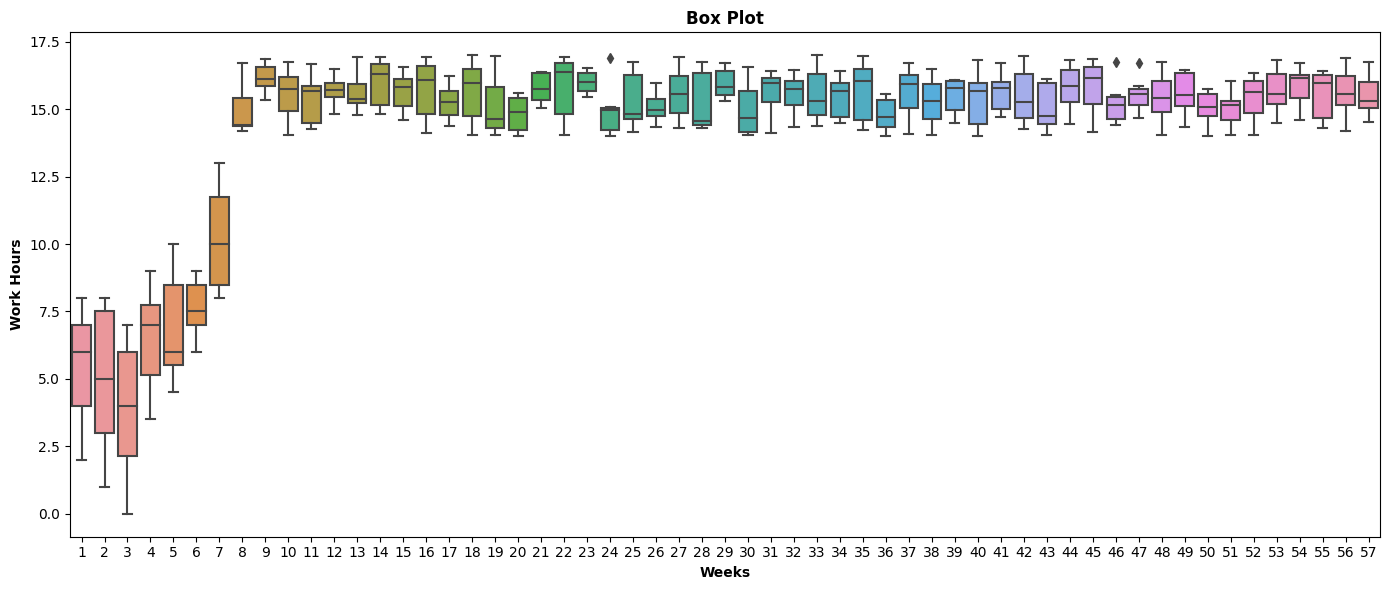

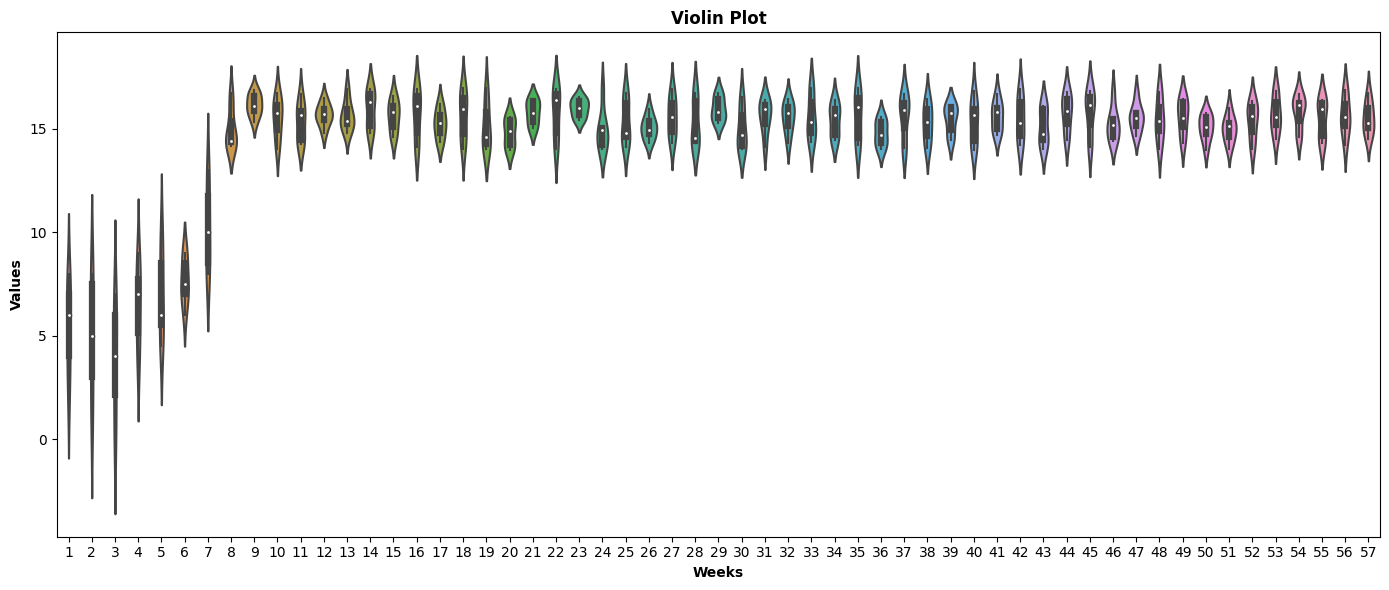

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparing our data

data = {
    'Week 1': [8.0, 6.0, 7.0, 7.0, 4.0, 4.0, 2.0],
    'Week 2': [2.0, 1.0, 5.0, 8.0, 8.0, 7.0, 4.0],
    'Week 3': [7.0, 0.0, 4.0, 6.0, 1.0, 6.0, 3.3],
    'Week 4': [7.5, 8.0, 7.0, 9.0, 5.3, 5.0, 3.5],
    'Week 5': [9.0, 10.0, 8.0, 4.5, 6.0, 6.0, 5.0],
    'Week 6': [8.0, 7.0, 6.0, 7.0, 9.0, 9.0, 7.5],
    'Week 7': [8.0, 11.0, 9.0, 8.0, 10.0, 13.0, 12.5]
}

weeks_to_add = 50

for week in range(8, weeks_to_add + 8):
    week_data = []
    for _ in range(7):
        day_data = np.random.uniform(14, 17)
        week_data.append(day_data)
    week_name = f"Week {week}"
    data[week_name] = week_data

df = pd.DataFrame(data)

days_of_week = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df.index = days_of_week

# Create a box plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.iloc[:, :])
plt.title('Box Plot', fontweight='bold')
plt.xlabel('Weeks', fontweight='bold')
plt.ylabel('Work Hours', fontweight='bold')
plt.gca().set_xticklabels([int(label.get_text()[5:]) for label in plt.gca().get_xticklabels()])  # Remove 'Week' from x-axis labels
plt.tight_layout()
plt.show()

# Create a violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=df.iloc[:, :])
plt.title('Violin Plot', fontweight='bold')
plt.xlabel('Weeks', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.gca().set_xticklabels([int(label.get_text()[5:]) for label in plt.gca().get_xticklabels()])  # Remove 'Week' from x-axis labels
plt.tight_layout()
plt.show()

In [12]:
# Transforming data to arrays for regression
X = []
y = []
for week, hours in data.items():
    for day, hour in enumerate(hours):
        X.append([int(week.split()[1]), day])
        y.append(hour)

X = np.array(X)  # Features: Week number, day of the week
X = np.reshape(X, (-1, 2))  # Reshape to have two columns

y = np.array(y)  # Target: hours

# Normalize the data
scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape y_normalized back to a 1D array
y_normalized = y_normalized.ravel()

# Split the data into training, validation, and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

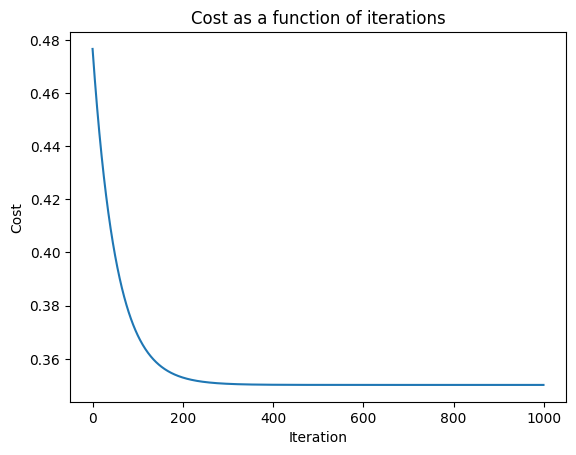

Metrics before polynomial regression:
Training MSE: 0.7003515132655606
Validation MSE: 0.651823083156897
Test MSE: 0.8700891190613118


In [13]:
# Training the model: Choosing the correct parameters for our model by computing the gradient descent, plotting the results to check if our implementation is accurate..
def compute_cost(X, y, w, b):
    m = len(y)
    predictions = np.dot(X, w) + b
    cost = (1/(2 * m)) * np.sum(np.square(predictions - y))
    return cost

def compute_gd(X, y, w, b, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = np.dot(X, w) + b
        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)
        
        w = w - alpha * dw
        b = b - alpha * db
        
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        
    return w, b, cost_history

w = np.zeros(X_train.shape[1])
b = 0

alpha = 0.01
iterations = 1000

# Run gradient descent
w, b, cost_history = compute_gd(X_train, y_train, w, b, alpha, iterations)

plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost as a function of iterations')
plt.show()

# Compute predictions on training, validation, and test sets using linear regression
y_train_pred = np.dot(X_train, w) + b
y_val_pred = np.dot(X_val, w) + b
y_test_pred = np.dot(X_test, w) + b

# Print MSE on training, validation, and test sets for linear regression
print("Metrics before polynomial regression:")
print(f"Training MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Validation MSE: {mean_squared_error(y_val, y_val_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred)}")

Training cost: 0.19973869262734786, Validation cost: 0.2522818973514424


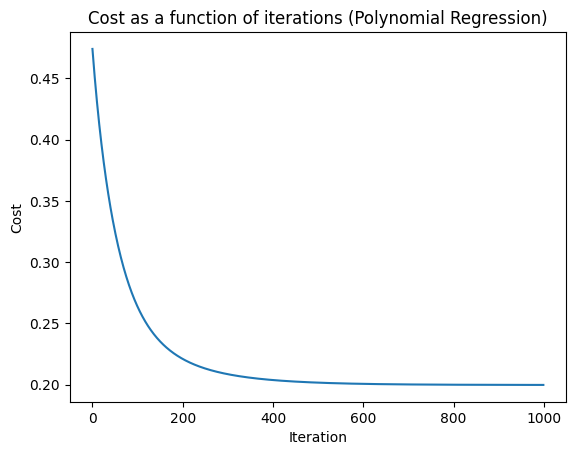

Training MSE: 0.3994773852546958
Validation MSE: 0.5045637947028847
Test MSE: 0.5541382319762274


In [24]:
# Splitting our dataset
# ... the data normalization part remains the same ...
X_temp, X_test, y_temp, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Degree of polynomial features
degree = 2

# Apply polynomial transformation
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Initialize weights for polynomial features
w_poly = np.zeros(X_train_poly.shape[1])

# Run gradient descent with polynomial features
w_poly, b_poly, cost_history_poly = compute_gd(X_train_poly, y_train, w_poly, b, alpha, iterations)

# Evaluate the model
train_cost = compute_cost(X_train_poly, y_train, w_poly, b_poly)
val_cost = compute_cost(X_val_poly, y_val, w_poly, b_poly)
print(f"Training cost: {train_cost}, Validation cost: {val_cost}")

# Compute predictions on training, validation and test sets
y_train_pred_poly = np.dot(X_train_poly, w_poly) + b_poly
y_val_pred_poly = np.dot(X_val_poly, w_poly) + b_poly
y_test_pred_coly = np.dot(X_test_poly, w_poly) + b_poly

# Plot the loss chart for polynomial regression
plt.plot(range(iterations), cost_history_poly)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost as a function of iterations (Polynomial Regression)')
plt.show()

# Print MSE on training and validation sets for polynomial regression
print(f"Training MSE: {mean_squared_error(y_train, y_train_pred_poly)}")
print(f"Validation MSE: {mean_squared_error(y_val, y_val_pred_poly)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_coly)}")

#The results shows that the polynomial regression yields relatively better results.